In [53]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [54]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [55]:
# Normalize the data (scale the pixel values to range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0

In [56]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [57]:
# Build a simple CNN model
model = models.Sequential()

In [58]:
# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

In [59]:
#Secount convoLutional Layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [60]:
# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [61]:
# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())

In [62]:
# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))

In [63]:
# Output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))

In [64]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3415 - loss: 1.7945 - val_accuracy: 0.5153 - val_loss: 1.3373
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5567 - loss: 1.2504 - val_accuracy: 0.5744 - val_loss: 1.1864
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6180 - loss: 1.0857 - val_accuracy: 0.6314 - val_loss: 1.0288
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6566 - loss: 0.9786 - val_accuracy: 0.6569 - val_loss: 0.9669
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6928 - loss: 0.8781 - val_accuracy: 0.6624 - val_loss: 0.9858
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7060 - loss: 0.8429 - val_accuracy: 0.6829 - val_loss: 0.9188
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7232 - loss: 0.7884 - val_accuracy: 0.6896 - val_loss: 0.9038
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7457 - loss: 0.7

In [66]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

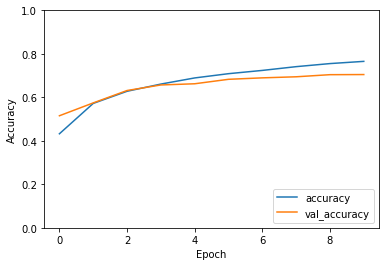

In [67]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [68]:
# Make predictions on the test set
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [69]:
# Visualizing a few test images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

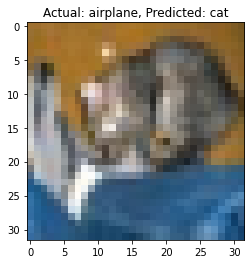

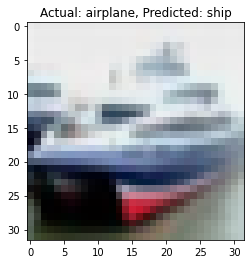

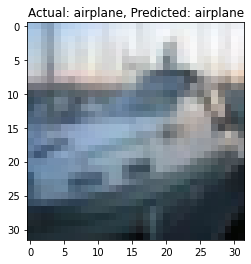

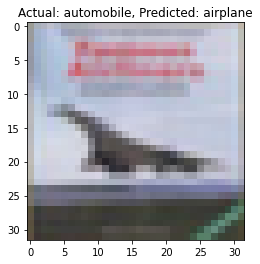

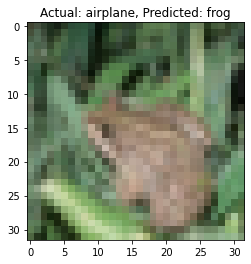

In [70]:
# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()